In [42]:
# !pip install numpy
# !pip install laspy
# !pip install matplotlib
# !pip install plotly

In [50]:
import numpy as np
import laspy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from pathlib import Path
from matplotlib.colors import ListedColormap
from utils.plot_las_visualization import (
    plot_las_file, 
    plot_las_file_2d_views, 
    plot_multiple_las_files
)

from utils.plot_las_plotly import plot_las_3d_plotly

## Load LAS Files from data folder

In [36]:
# Set the data directory
data_dir = Path('data')

# List all .las files
las_files = list(data_dir.glob('*.las'))
print(f"Found {len(las_files)} LAS files:")
for f in las_files:
    print(f"  - {f.name}")

Found 25 LAS files:
  - 434652_ICGC.las
  - 434654_ICGC.las
  - 434656_ICGC.las
  - 434658_ICGC.las
  - 434660_ICGC.las
  - 434662_ICGC.las
  - 436648_ICGC.las
  - 436650_ICGC.las
  - 436652_ICGC.las
  - 436654_ICGC.las
  - 436656_ICGC.las
  - 436658_ICGC.las
  - 436660_ICGC.las
  - 436662_ICGC.las
  - 438648_ICGC.las
  - 438650_ICGC.las
  - 438652_ICGC.las
  - 438654_ICGC.las
  - 438656_ICGC.las
  - 438658_ICGC.las
  - 438660_ICGC.las
  - 438662_ICGC.las
  - 440648_ICGC.las
  - 440650_ICGC.las
  - 440652_ICGC.las


## Load and Inspect a Single LAS File

In [37]:
# Load the first LAS file
las_file_path = las_files[5]
print(f"Loading: {las_file_path}")

# Read the LAS file
las_data = laspy.read(las_file_path)

# Print basic information
print(f"\nNumber of points: {len(las_data.points)}")
print(f"Point format: {las_data.point_format}")
print(f"\nAvailable dimensions:")
for dim in las_data.point_format.dimension_names:
    print(f"  - {dim}")

Loading: data\434662_ICGC.las

Number of points: 6800254
Point format: <PointFormat(8, 12 bytes of extra dims)>

Available dimensions:
  - X
  - Y
  - Z
  - intensity
  - return_number
  - number_of_returns
  - synthetic
  - key_point
  - withheld
  - overlap
  - scanner_channel
  - scan_direction_flag
  - edge_of_flight_line
  - classification
  - user_data
  - scan_angle
  - point_source_id
  - gps_time
  - red
  - green
  - blue
  - nir
  - Distance
  - Group
  - Normal


## Extract Point Cloud Data

In [23]:
# Extract coordinates
x = las_data.x
y = las_data.y
z = las_data.z

print(f"X range: [{x.min():.2f}, {x.max():.2f}]")
print(f"Y range: [{y.min():.2f}, {y.max():.2f}]")
print(f"Z range: [{z.min():.2f}, {z.max():.2f}]")

# Check for classification (labels)
if hasattr(las_data, 'classification'):
    classification = las_data.classification
    unique_classes = np.unique(classification)
    print(f"\nUnique classification labels: {unique_classes}")
    print(f"Number of unique classes: {len(unique_classes)}")
    for cls in unique_classes:
        count = np.sum(classification == cls)
        print(f"  Class {cls}: {count} points ({count/len(classification)*100:.2f}%)")
else:
    print("\nNo classification information found")

# Check for RGB colors
has_rgb = False
if hasattr(las_data, 'red') and hasattr(las_data, 'green') and hasattr(las_data, 'blue'):
    has_rgb = True
    red = las_data.red
    green = las_data.green
    blue = las_data.blue
    print(f"\nRGB information available")
else:
    print(f"\nNo RGB information available")

# Check for intensity
if hasattr(las_data, 'intensity'):
    intensity = las_data.intensity
    print(f"Intensity range: [{intensity.min()}, {intensity.max()}]")

X range: [434479.72, 436000.00]
Y range: [4662000.00, 4662376.12]
Z range: [561.70, 703.87]

Unique classification labels: [  1   2   3   4   5   6   8  11  13  15  16  17  18 135]
Number of unique classes: 14
  Class 1: 25291 points (0.37%)
  Class 2: 1565836 points (23.03%)
  Class 3: 414626 points (6.10%)
  Class 4: 212563 points (3.13%)
  Class 5: 2895058 points (42.57%)
  Class 6: 154889 points (2.28%)
  Class 8: 994380 points (14.62%)
  Class 11: 72 points (0.00%)
  Class 13: 407055 points (5.99%)
  Class 15: 606 points (0.01%)
  Class 16: 23977 points (0.35%)
  Class 17: 2936 points (0.04%)
  Class 18: 223 points (0.00%)
  Class 135: 102742 points (1.51%)

RGB information available
Intensity range: [154, 65535]


## 3D Visualization - Full Point Cloud

Visualizing 50002 points (subsampled by factor 136)


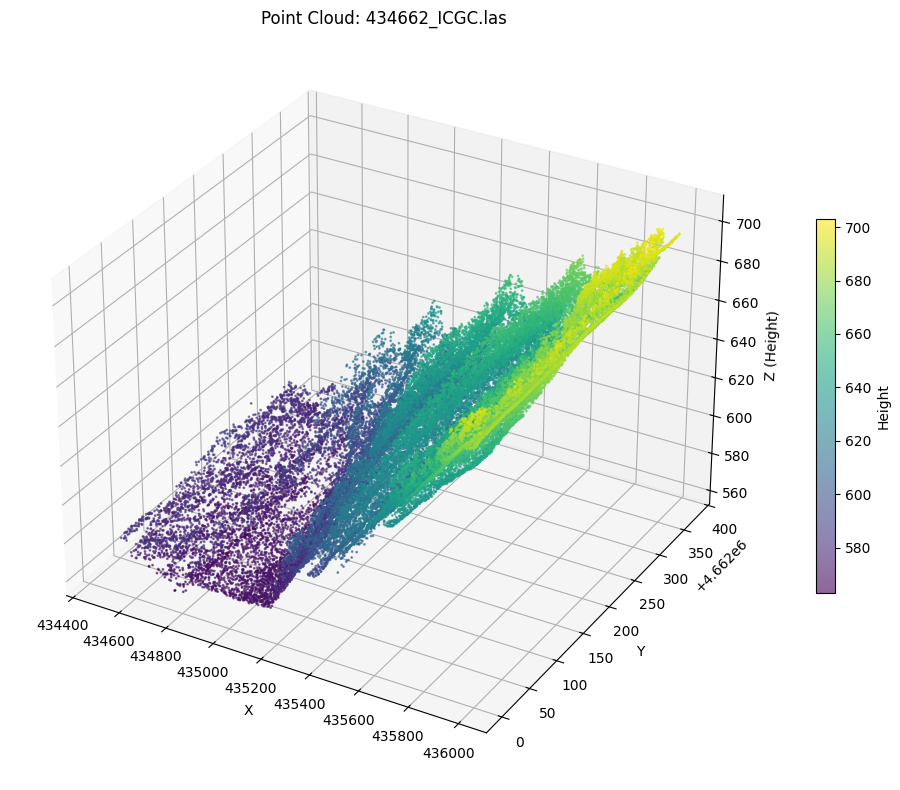

In [28]:
# Subsample for faster visualization (take every N-th point)
subsample_factor = max(1, len(x) // 50000)  # Limit to ~50k points
x_sub = x[::subsample_factor]
y_sub = y[::subsample_factor]
z_sub = z[::subsample_factor]

print(f"Visualizing {len(x_sub)} points (subsampled by factor {subsample_factor})")

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points colored by height (z-coordinate)
scatter = ax.scatter(x_sub, y_sub, z_sub, c=z_sub, cmap='viridis', s=1, alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (Height)')
ax.set_title(f'Point Cloud: {las_file_path.name}')
plt.colorbar(scatter, label='Height', shrink=0.5)
plt.tight_layout()
plt.show()

## 3D Visualization - Colored by Classification

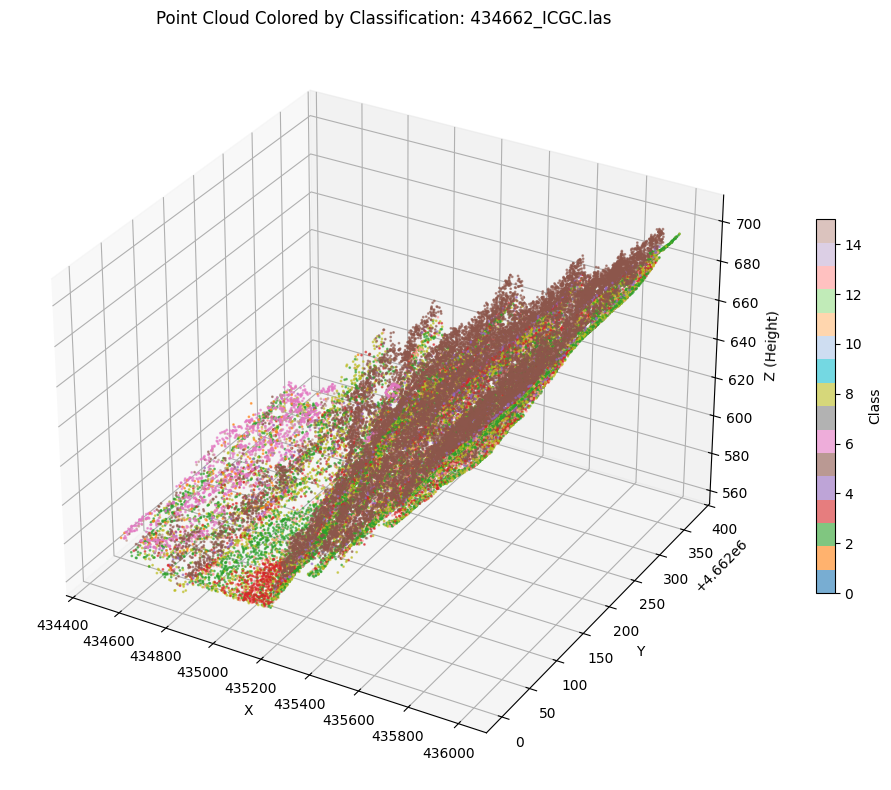

In [ ]:
if hasattr(las_data, 'classification'):
    classification_sub = classification[::subsample_factor]
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define custom colors for each of the 16 possible classes
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
              '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94']
    
    # Create a custom colormap from the defined colors
    custom_cmap = ListedColormap(colors)
    
    scatter = ax.scatter(x_sub, y_sub, z_sub, c=classification_sub, 
                        cmap=custom_cmap, s=1, alpha=0.6, vmin=0, vmax=15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Height)')
    ax.set_title(f'Point Cloud Colored by Classification: {las_file_path.name}')
    plt.colorbar(scatter, label='Class', shrink=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Classification not available for this file")

Successfully loaded LAS file: 434662_ICGC.las
Number of points: 6,800,254
Unique classes found: [np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(8), np.uint8(11), np.uint8(13), np.uint8(15), np.uint8(16), np.uint8(17), np.uint8(18), np.uint8(135)]
Points in class 14 (power lines): 0 (0.00%)
Points in class 15 (transmission towers): 606 (0.01%)
Plot saved to: ./figs/3d_view_example.png


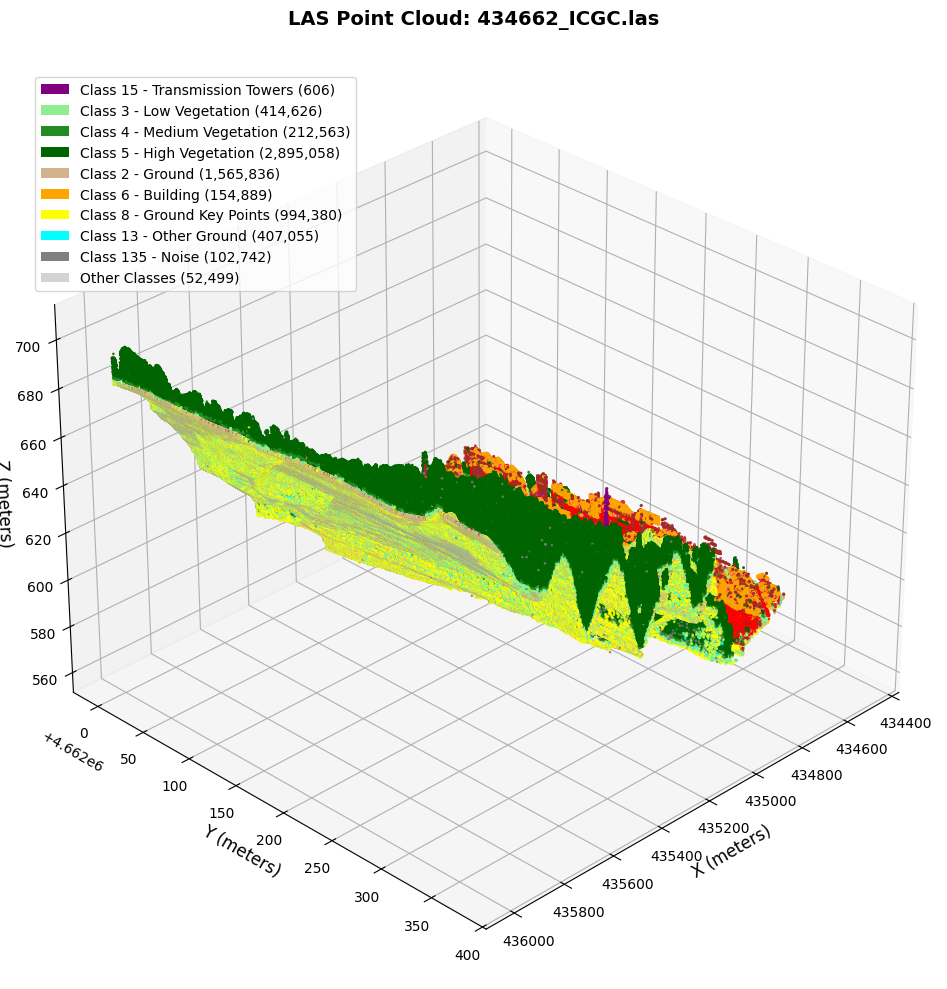

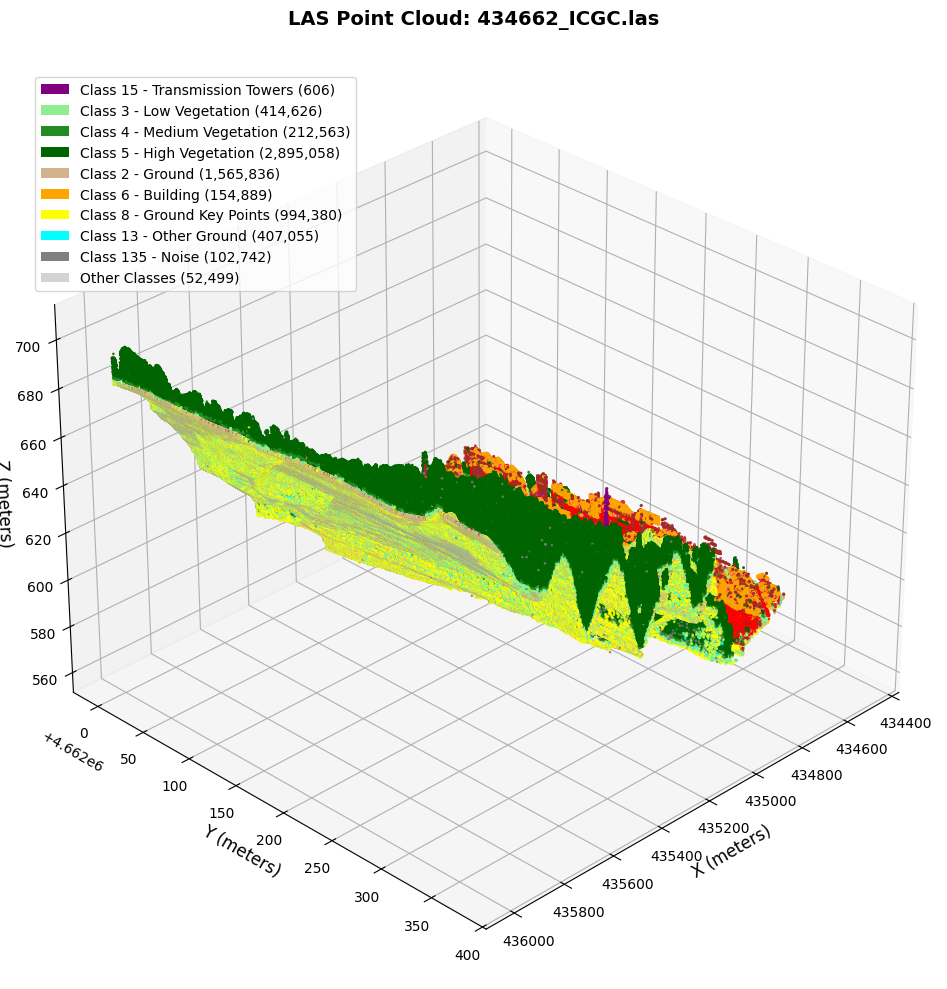

In [39]:
plot_las_file(las_file_path, './figs/3d_view_example.png')

In [51]:
# With custom parameters
fig = plot_las_3d_plotly(
    las_file_path=las_file_path,
    max_points=500000,           # Subsample to 100k points
    sampling_method='stratified', # Keep class distribution
    color_by='class',            # Color by classification
    show_legend=True,            # Display legend
    point_size=2,                # Point size
    opacity=0.8,                 # Transparency
    save_html='./figs/3d_view_example.html'      # Save as HTML
)

Loading LAS file: 434662_ICGC.las
Total points: 6,800,254
Unique classes: [1, 2, 3, 4, 5, 6, 8, 11, 13, 15, 16, 17, 18, 135]
Subsampling from 6,800,254 to 500,000 points using 'stratified' method
Interactive plot saved to: figs\3d_view_example.html


## Top-Down View (2D Projection)

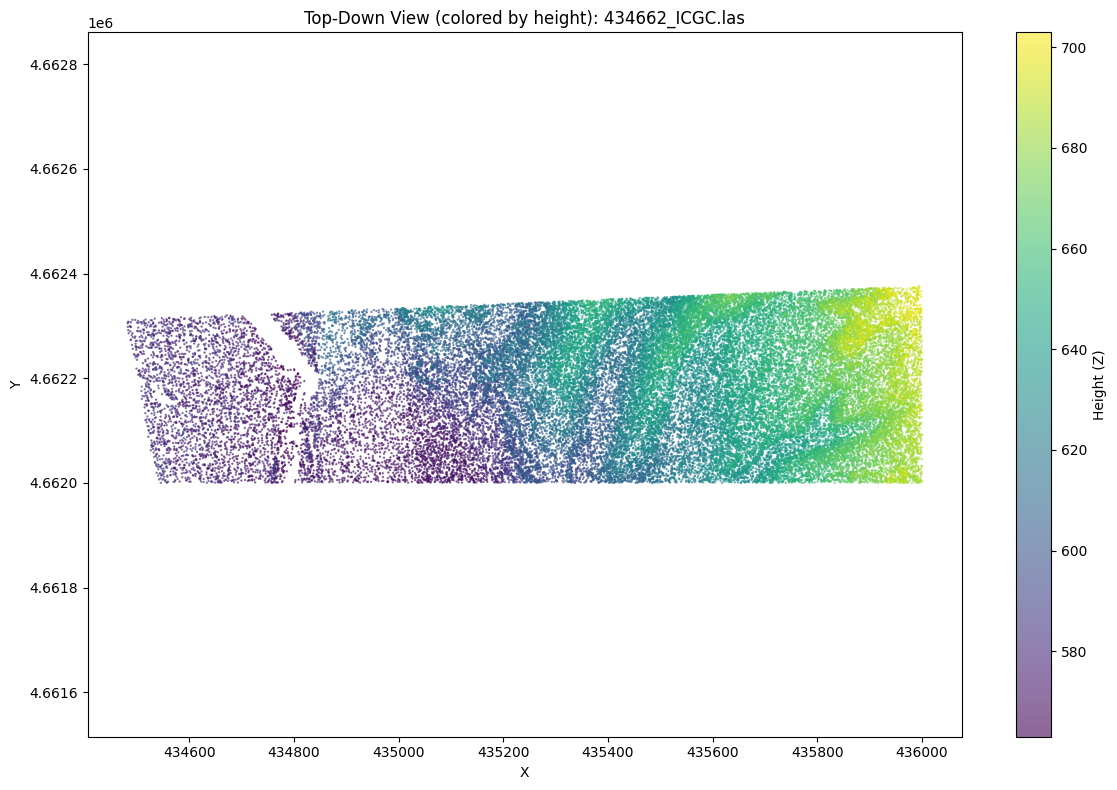

In [31]:
plt.figure(figsize=(12, 8))
plt.scatter(x_sub, y_sub, c=z_sub, cmap='viridis', s=0.5, alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Top-Down View (colored by height): {las_file_path.name}')
plt.colorbar(label='Height (Z)')
plt.axis('equal')
plt.tight_layout()
plt.show()

Successfully loaded LAS file: 434662_ICGC.las
2D views plot saved to: ./figs/2d_view_example.png


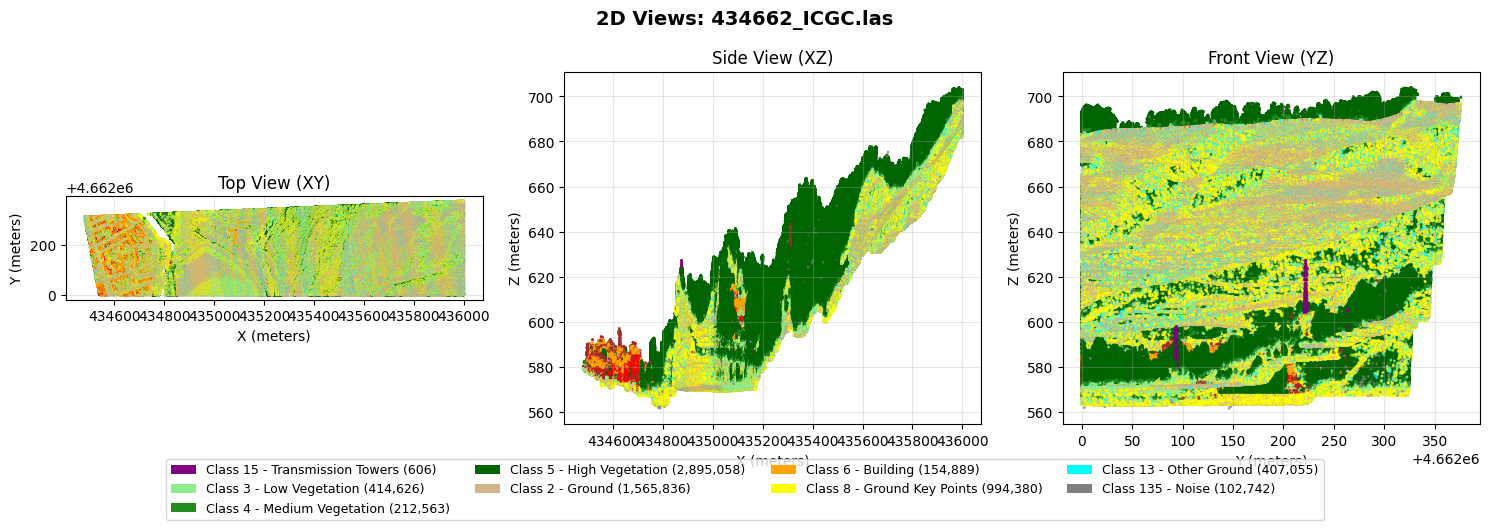

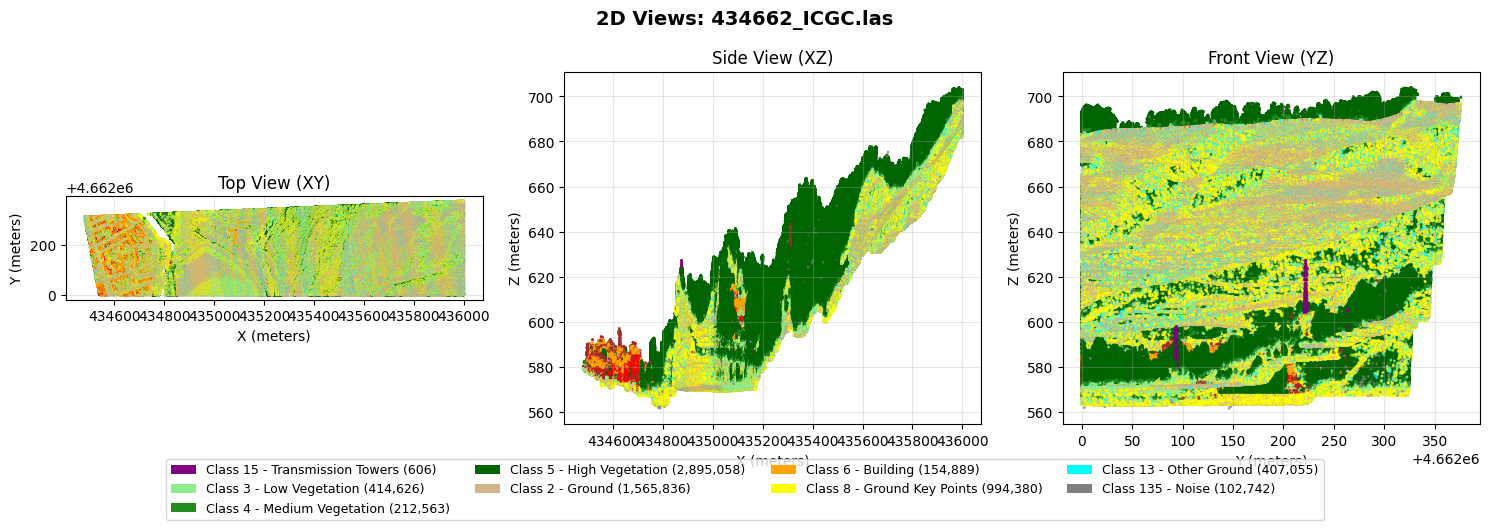

In [38]:
plot_las_file_2d_views(las_file_path, './figs/2d_view_example.png')

## Height Distribution

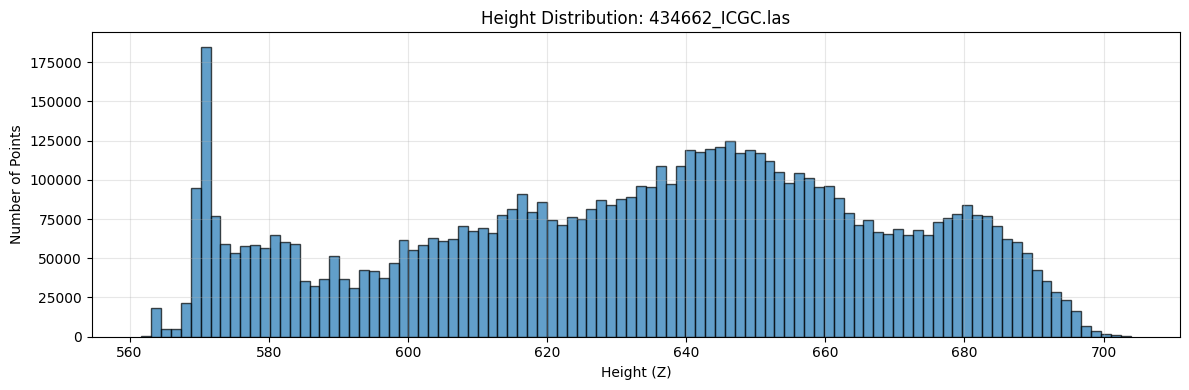

In [32]:
plt.figure(figsize=(12, 4))
plt.hist(z, bins=100, alpha=0.7, edgecolor='black')
plt.xlabel('Height (Z)')
plt.ylabel('Number of Points')
plt.title(f'Height Distribution: {las_file_path.name}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Convert to Numpy Array for Deep Learning

In [33]:
# Create a numpy array with XYZ coordinates
points = np.vstack((x, y, z)).T
print(f"Point cloud shape: {points.shape}")
print(f"Data type: {points.dtype}")

# Normalize coordinates (important for deep learning)
points_normalized = points - points.mean(axis=0)
max_distance = np.max(np.linalg.norm(points_normalized, axis=1))
points_normalized = points_normalized / max_distance

print(f"\nNormalized point cloud shape: {points_normalized.shape}")
print(f"Normalized range: [{points_normalized.min():.3f}, {points_normalized.max():.3f}]")

# If we have additional features, we can concatenate them
features_list = [points]

if hasattr(las_data, 'intensity'):
    # Normalize intensity
    intensity_norm = (intensity - intensity.min()) / (intensity.max() - intensity.min() + 1e-8)
    features_list.append(intensity_norm.reshape(-1, 1))
    print("Added intensity feature")

if has_rgb:
    # Normalize RGB
    rgb = np.vstack((red, green, blue)).T
    rgb_norm = rgb / 65535.0  # LAS RGB values are typically 16-bit
    features_list.append(rgb_norm)
    print("Added RGB features")

# Concatenate all features
point_features = np.hstack(features_list)
print(f"\nFinal feature array shape: {point_features.shape}")
print(f"Features per point: {point_features.shape[1]}")

Point cloud shape: (6800254, 3)
Data type: float64

Normalized point cloud shape: (6800254, 3)
Normalized range: [-0.990, 0.546]
Added intensity feature
Added RGB features

Final feature array shape: (6800254, 7)
Features per point: 7


## Load and Compare Multiple Files

In [34]:
# Load all files and show basic statistics
print("Summary of all LAS files:\n")
print(f"{'Filename':<25} {'Points':<12} {'Classes':<10}")
print("-" * 50)

for las_file in las_files:
    las = laspy.read(las_file)
    n_points = len(las.points)
    
    if hasattr(las, 'classification'):
        n_classes = len(np.unique(las.classification))
    else:
        n_classes = "N/A"
    
    print(f"{las_file.name:<25} {n_points:<12} {str(n_classes):<10}")

Summary of all LAS files:

Filename                  Points       Classes   
--------------------------------------------------
434652_ICGC.las           72856        8         
434654_ICGC.las           2972585      14        
434656_ICGC.las           9264137      13        
434658_ICGC.las           20009968     11        
434660_ICGC.las           29785476     15        
434662_ICGC.las           6800254      14        
436648_ICGC.las           13794346     15        
436650_ICGC.las           30218449     14        
436652_ICGC.las           41876203     16        
436654_ICGC.las           56245328     15        
436656_ICGC.las           70076959     15        
436658_ICGC.las           85096389     15        
436660_ICGC.las           80752532     15        
436662_ICGC.las           12835113     14        
438648_ICGC.las           22481123     15        
438650_ICGC.las           51444945     15        
438652_ICGC.las           52899216     15        
438654_ICGC.las       